In [204]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 데이터 불러오기

In [205]:
train=pd.read_csv("C:\\Users\\1-10\\Desktop\\python\\04_Titanic\\titanic_train.csv")

#### head를 이용해서 데이터가 제대로 들어왔는지 확인하기

In [206]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 받은 데이터의 간략적인 정보 확인

In [207]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 데이터에 NaN이 없는지 확인

In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [209]:
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

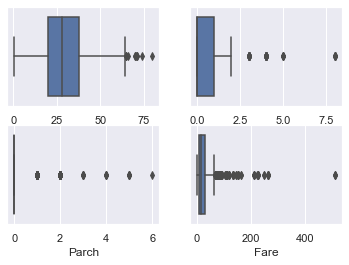

In [210]:
fig,ax=plt.subplots(2,2)
sns.boxplot(train['Age'],ax=ax[0,0])
sns.boxplot(train['SibSp'],ax=ax[0,1])
sns.boxplot(train['Parch'],ax=ax[1,0])
sns.boxplot(train['Fare'],ax=ax[1,1])

In [211]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices=[]
    for col in features:
        # 제 1사분위수
        Q1=np.percentile(df[col],25) # percentile - 백분위 등수
        # 제 3사분위수
        Q3=np.percentile(df[col],75)
        # 사분위수 범위
        IQR=Q3-Q1
        # outlier 
        outlier_step=1.5*IQR
        outlier_list_col=df[ (df[col] < Q1 - outlier_step )|( df[col] > Q3 + outlier_step )].index # 조건이 들어가서 boolean indexing이 들어가고 .index가 들어가있기 때문에 인덱스만 출력
        
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(k for k, v in outlier_indices.items() if v>n)
    
    return multiple_outliers

# detect outliers from Age, SibSp, Parch, Fare
Outliers_to_drop=detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [212]:
Outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [213]:
# 각기 어느 부분에서 아웃라이어가 되었는지 확인
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [214]:
# 아웃라이어인 것들을 제거하자! -> 단순 제거가 아니라 아웃라이어 중첩된 것들을 제거
train=train.drop(Outliers_to_drop, axis=0).reset_index(drop=True) # reset_index를 통해 0 to 880까지 정렬
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


### Feature Analysis

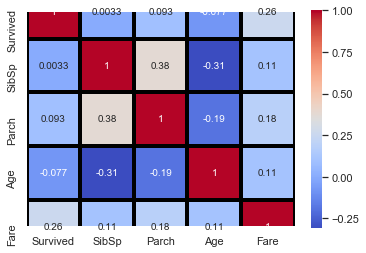

In [215]:
sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),
           annot=True,cmap='coolwarm',linewidths=3,linecolor='black',fmt=".2g",square=True)

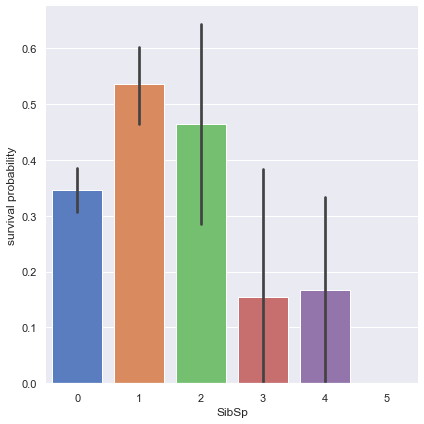

In [216]:
g=sns.catplot(x="SibSp", y="Survived", data=train, kind="bar", height=6, palette="muted")
g.despine(left=True)
g=g.set_ylabels("survival probability")

* 해석) 위의 결과 SibSp의 값이 작을수록 생존 확률이 높고, 3 이상의 경우에 낮은 분포를 보이게 된다 -> 향후 이 부분에 대한 것을 바탕으로 변수를 변형을 하면 앞에서 단순히 안보인 상관관계에 대한 것을 어느 정도 확보해 나갈 수 있다

### 02)  Parch : 가족 단위

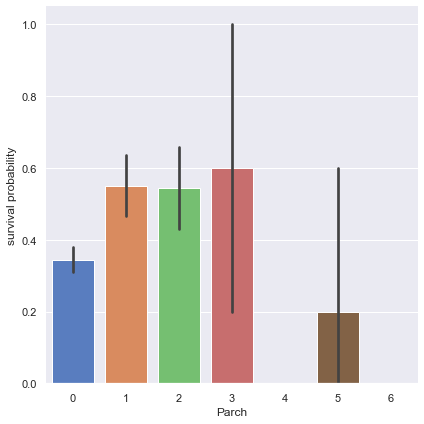

In [217]:
ax=sns.catplot(x="Parch", y="Survived", data=train, kind="bar", height=6, palette="muted")
ax.despine(left=True)
ax=ax.set_ylabels("survival probability")
# 막대기는 표준 편차를 나타냄

* 해석) 1~2(작은 가구)가 단독(0), 3~4(중간 가구), 5~6(대가족)보다 높은 생존률이고, 3인 경우에서는 상당히 큰 표준편차를 나타내고 있다

### 03) Age

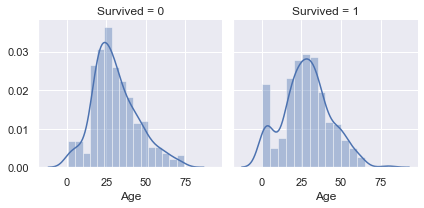

In [218]:
ax=sns.FacetGrid(train, col='Survived')
ax=ax.map(sns.distplot, "Age")

In [219]:
train.loc[:, ["Survived","Age"]].corr()

,Survived,Age
Survived,1.000000,-0.076867
Age,-0.076867,1.000000


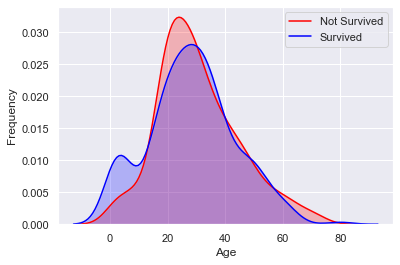

In [220]:
g=sns.kdeplot(train["Age"][(train["Survived"]==0)&(train["Age"].notnull())],
             color="Red", shade=True) # survived가 0이면서 나이가 null이 아닌 값
g=sns.kdeplot(train["Age"][(train["Survived"]==1)&(train["Age"].notnull())],
             ax=g, color="Blue", shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g=g.legend(["Not Survived", "Survived"])

### 04) Fare

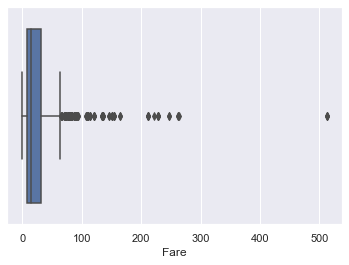

In [221]:
sns.boxplot(train["Fare"])

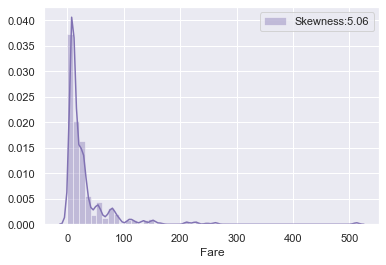

In [222]:
ax=sns.distplot(train["Fare"], color="m", label="Skewness:%.2f"%(train["Fare"].skew())) # skew : 왜도
ax=ax.legend(loc="best")

* 참고) skewness(왜도) : 얼마나 한 쪽으로 치우쳐졌는지에 대한 지표(데이터가 왼쪽에 많아서 오른쪽으로 꼬리가 기냐 +, 데이터가 오른쪽에 많아서 왼쪽으로 꼬리가 기냐-) & 일반적으로 -2 ~ +2 사이를 치우침이 별로 없다고 판단하는 기준이 된다

* 참고) skewness인 데이터는 변환을 해야하는 이유가 무엇이냐면 한쪽으로 너무 치우친 데이터를 학습을 하게 된다면 꼬리 부분이 상대적으로 적고 빈도도 아주 높지 않기 때문에 이러한 부분에 대한 학습이 잘 이루어지지 않는다. 그러므로 유의미한 값이라고 한다면 이러한 특성이 잘 학습이 안되는 경향이 있을 수 있음! 특히나 요금은 객실과 관련이 있고 객실의 경우에는 생존에도 영향을 미치는 부분이기에 이러한 영향력을 제대로 학습을 하기 위해서는 그냥 처리하면 안될 수도 있다

* 참고) 왼쪽 데이터가 많은 경우 : root, log10
  오른쪽 데이터가 많은 경우 : 제곱, log2

### 04-1) log 변환하여 분포를 고르게 피자 -> 아래와 같이 skewness를 줄여보자

In [223]:
train["Fare"]=train["Fare"].apply(lambda x : np.log(x) if x>0 else 0)

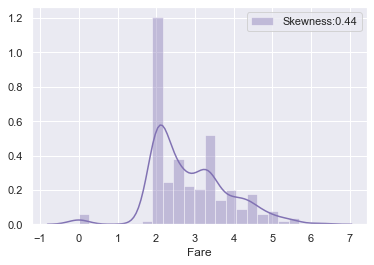

In [224]:
ax=sns.distplot(train["Fare"], color="m", label="Skewness:%.2f"%(train["Fare"].skew())) 
ax=ax.legend(loc="best")

### 05) Sex

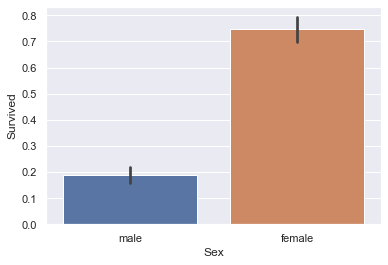

In [225]:
sns.barplot(x=train["Sex"],y=train["Survived"])

In [226]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


* 해석) 명확하게 성별에 따른 차이가 발생을 함 -> 타겟에 대한 중요한 변수임!

### 06) PClass

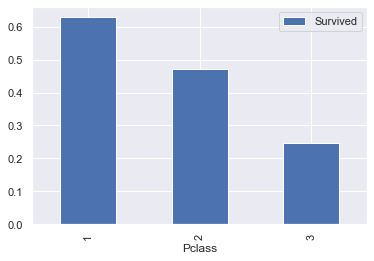

In [227]:
train[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar()

* 등급별로 남자 / 여자 따로 볼 경우

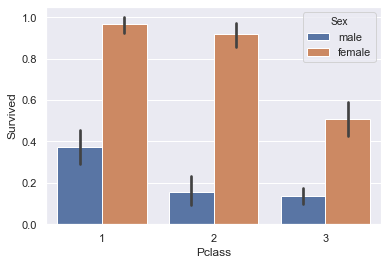

In [228]:
sns.barplot(x=train["Pclass"],y=train["Survived"],hue="Sex", data=train)

### 07) Embarked : 빠진 데이터 수 확인 -> 제일 많이 나타나는 종류 확인 -> 이를 바탕으로 빠진 데이터 채우기 -> 각기 항목별 생존여부와 확인하기

In [229]:
print("Embarked 빠진 데이터 수 : {0}".format(train["Embarked"].isnull().sum()))

Embarked 빠진 데이터 수 : 2


In [230]:
train["Embarked"].value_counts()

S    634
C    168
Q     77
Name: Embarked, dtype: int64

In [231]:
train["Embarked"]=train["Embarked"].fillna("S")
# 빠진 데이터의 수가 2개밖에 없고 S의 수가 월등히 많기 때문에 S로 na를 채운다

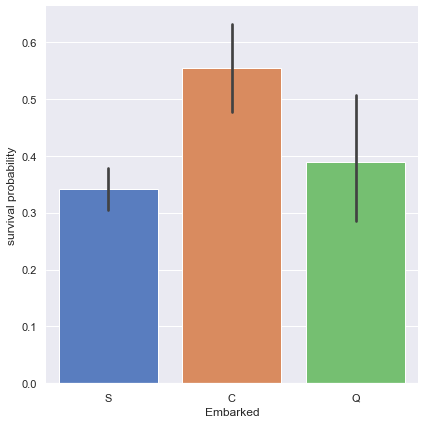

In [232]:
g=sns.catplot(x="Embarked",y="Survived", data=train, height=6, kind="bar", palette="muted").despine(left=True)
g.set_ylabels("survival probability")

* 해석 : C 항구가 높은 것을 볼 수 있다 -> 항구별/지역별로 다른 이유는?

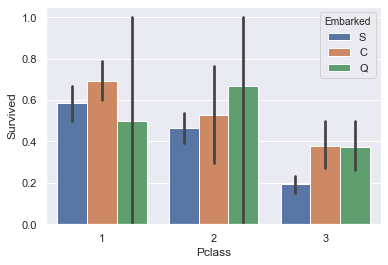

In [233]:
sns.barplot(x=train["Pclass"],y=train["Survived"],hue="Embarked",data=train)
# hue : 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있음

* 해석 : 항구별로 생존률이 다른 부분을 찾아보니, C 항구 출발자들의 객실등급에서 1등석의 비율이 높다

### 비어있는 값 찾기

#### 01) Embarked : 앞에서 1개의 빈 값이 있어서  해결을 함

In [234]:
train["Age"].isnull().sum()

170

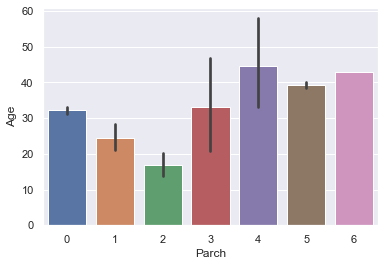

In [235]:
sns.barplot(y="Age", x="Parch", data=train)

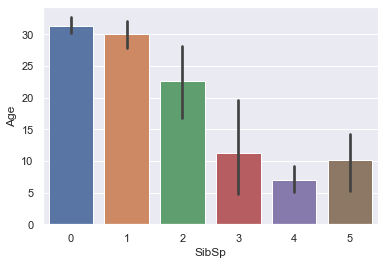

In [236]:
sns.barplot(y="Age", x="SibSp", data=train)

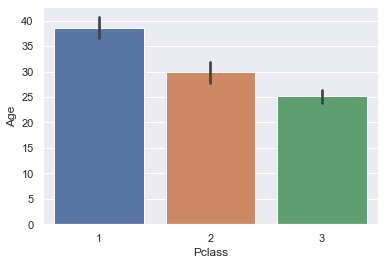

In [237]:
sns.barplot(y="Age", x="Pclass", data=train)

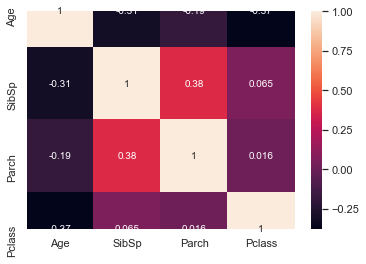

In [238]:
fig,ax=plt.subplots(nrows=1, ncols=1)
sns.heatmap(train.loc[:, ["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True, ax=ax)
# annot : 각 셀에 숫자 입력

In [239]:
index_NaN_age=list(train["Age"][train["Age"].isnull()].index) # age에서 null값인 것들의 index 가져오기

age_idx=train.columns.get_loc("Age")
SibSp_idx=train.columns.get_loc("SibSp")
Parch_idx=train.columns.get_loc("Parch")
Pclass_idx=train.columns.get_loc("Pclass")

for i in index_NaN_age :
    age_med=train["Age"].median()
    age_pred=train["Age"][( (train["SibSp"]==train.iloc[i]["SibSp"]) & 
                           (train['Parch']==train.iloc[i]["Parch"]) &
                          (train['Pclass']==train.iloc[i]['Pclass']) )].median()
    # age_pred는 sibsp, parch, pclass 값이 같은 인덱스들을 찾아서 그것들의 age의 중앙값을 계산
    if not np.isnan(age_pred):
        train.iat[i,age_idx]=age_pred    # age_pred가 nan이 아니면 pred값으로 채우기
    else:
        train.iat[i,age_idx]=age_med    # age_pred가 nan이면 med값으로 채우기

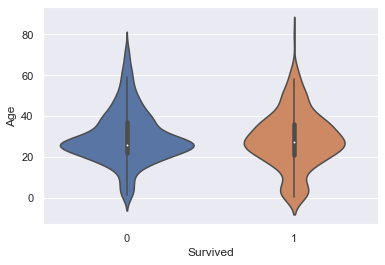

In [240]:
sns.violinplot(x="Survived", y="Age", data=train)

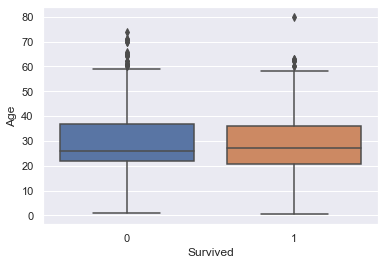

In [241]:
sns.boxplot(x="Survived", y="Age", data=train)

#### 03) Cabin

In [242]:
train["Cabin"].describe()

count     201
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [243]:
train["Cabin"].isnull().sum()

680

In [244]:
train["Cabin"]=train["Cabin"].fillna("X")
train["Cabin"]=train["Cabin"].apply(lambda x : str(x)[:1])

train["Cabin"].isnull().sum()

0

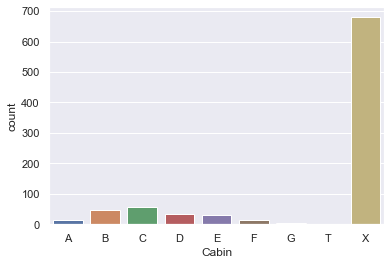

In [245]:
sns.countplot(train["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

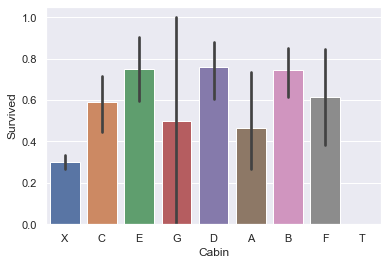

In [246]:
sns.barplot(x="Cabin",y="Survived",data=train)

#### 새로운 지표 만들기

In [247]:
train["Fsize"]=train["SibSp"]+train["Parch"]+1

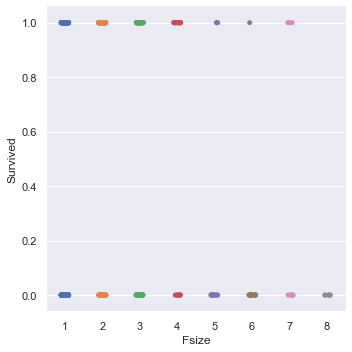

In [248]:
sns.catplot(x="Fsize",y="Survived",data=train)

In [249]:
train['Single']=train['Fsize'].apply(lambda x: 1 if x == 1 else 0)
train['SmallF']=train['Fsize'].apply(lambda x : 1 if x == 2 else 0)
train['MedF']=train['Fsize'].apply(lambda x : 1 if 3 <= x <= 4 else 0)
train['LargeF']=train['Fsize'].apply(lambda x : 1 if x >= 5 else 0)

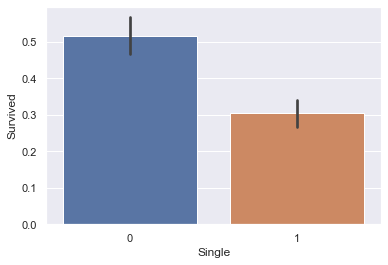

In [250]:
sns.barplot(x=train["Single"],y=train["Survived"])

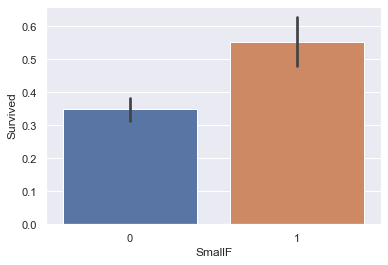

In [251]:
sns.barplot(x=train["SmallF"],y=train["Survived"])

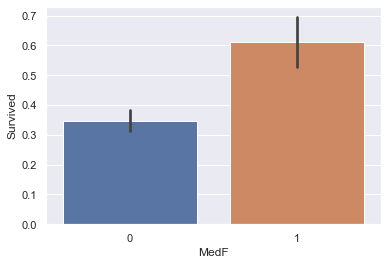

In [252]:
sns.barplot(x=train["MedF"],y=train["Survived"])

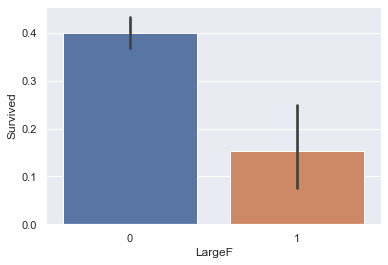

In [253]:
sns.barplot(x=train["LargeF"],y=train["Survived"])

#### 전처리

In [254]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [255]:
def titanic_fillna(df):
    return df

In [256]:
def drop_feature(df):
    data.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)
    return df

#### 인코딩

In [257]:
def format_features(df):
    # 변경할 컬럼
    features=["Cabin","Sex","Embarked"]
    for feature in features:
        # 각 컬럼별로 수행할 인코더 설정
        le=preprocessing.LabelEncoder()
        # 인코딩할 컬럼 설정 및 학습 수행 -> fit
        le=le.fit(df.loc[:,feature])
        # 실제 학습한 내용 적용 -> transform
        df.loc[:, feature]=le.transform(df.loc[:,feature])
    
    # Scalar 사용할 수 있음
    return df

#### 위의 전처리들을 하나의 함수로 묶는 부분

In [258]:
def titanic_transform(df):
    df=titanic_fillna(df)
    df=drop_feature(df)
    df=format_features(df)
    return df

In [260]:
#X_titanic_train=titanic_transform(train)
X_titanic_train.head(3)

,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fsize,Single,SmallF,MedF,LargeF
0,1,22.0,1,0,1.981001,8,2,2,0,1,0,0
1,0,38.0,1,0,4.266662,2,0,2,0,1,0,0
2,0,26.0,0,0,2.070022,8,2,1,1,0,0,0


In [261]:
y_titanic_train=X_titanic_train.iloc[:,0]
X_titanic_train=X_titanic_train.iloc[:,1:]

### 데이터 분리

In [290]:
 from sklearn.model_selection import train_test_split

#### 그냥 분리

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, y_titanic_train, test_size=0.3, random_state=1234)

In [292]:
from sklearn.model_selection import KFold

In [293]:
# shuffle은 순서에 대해서도 섞어서 랜덤하게
kfold=KFold(n_splits=5, random_state=0, shuffle=True)

### 모델링

In [294]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#### Random Forest

In [295]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [296]:
RF=RandomForestClassifier(n_jobs=-1, random_state=1234)

In [297]:
scores=cross_val_score(RF, X_train, y_train, cv=kfold)

for iter_count, accuracy in enumerate(scores):
    print("RF 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("--------------------------------------------------------------------")
print("RF 교차 검증 평균 정확도 : {0:.4f}".format(scores.mean()))

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

RF 교차 검증 0 & 정확도 0.6774
RF 교차 검증 1 & 정확도 0.6829
RF 교차 검증 2 & 정확도 0.6911
RF 교차 검증 3 & 정확도 0.6504
RF 교차 검증 4 & 정확도 0.6748
--------------------------------------------------------------------
RF 교차 검증 평균 정확도 : 0.6753


In [298]:
parameters={"n_estimators":[100,150,200,250], "criterion" :['gini']}
 
n_iter_search=10
RF_rgs=RandomizedSearchCV(RF, param_distributions=parameters,cv=7,scoring='accuracy',n_jobs=-1,
                          verbose=1,random_state=1234,n_iter=n_iter_search)

In [299]:
RF_rgs.fit(X_train, y_train)

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 4 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.4s finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1, 

In [300]:
RF_rgs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [301]:
# 위의 결과 250 주변에서 gridsearch 사용
parameters={"n_estimators":[240,250,260,270], "criterion":['gini']}

In [302]:
grid_RF_clf=GridSearchCV(RF, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1)

In [303]:
grid_RF_clf.fit(X_train, y_train)

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=1234, verbose=0,
                                              warm_start=False),
             iid='

In [304]:
grid_RF_clf.best_params_

{'criterion': 'gini', 'n_estimators': 260}

In [305]:
grid_RF_clf.best_score_

0.6704545454545454

In [306]:
RF_best=grid_RF_clf.best_estimator_

In [307]:
RF_predictions=RF_best.predict(X_test)
accuracy=accuracy_score(y_test,RF_predictions)
print("RF에서 GridSearchCV로 찾은 결과:{0:.4f}".format(accuracy))

RF에서 GridSearchCV로 찾은 결과:0.6906


#### XGBoost

In [308]:
import xgboost as xgb
from xgboost import XGBClassifier

In [309]:
xgb=XGBClassifier()

In [310]:
scores=cross_val_score(xgb, X_train, y_train, cv=7)

for iter_count, accuracy in enumerate(scores):
    print("SVM 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("--------------------------------------------------------------------")
print("SVM 교차 검증 평균 정확도 : {0:.4f}".format(scores.mean()))
    

SVM 교차 검증 0 & 정확도 0.6818
SVM 교차 검증 1 & 정확도 0.6023
SVM 교차 검증 2 & 정확도 0.6818
SVM 교차 검증 3 & 정확도 0.6705
SVM 교차 검증 4 & 정확도 0.6932
SVM 교차 검증 5 & 정확도 0.6705
SVM 교차 검증 6 & 정확도 0.7045
--------------------------------------------------------------------
SVM 교차 검증 평균 정확도 : 0.6721


In [311]:
parameters = {
    'n_estimators':np.arange(1000,2000,100),
    'max_depth':np.arange(2,6),
    'learning_rate': np.arange(0, 0.2, 0.01),
    'objective': ['binary:logistic']
}

In [312]:
n_iter_search=10

xgb_rgs=RandomizedSearchCV(xgb, param_distributions=parameters, cv= kfold, verbose=1, scoring='accuracy',
                          n_jobs=-1, random_state=1234, n_iter=n_iter_search) # n_iter:데이터를 훈련하는 횟수

In [313]:
xgb_rgs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective=...
                   param_distributions={'learning_rate': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
                                        'max_depth': 

In [314]:
xgb_rgs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [316]:
# gridsearch 사용
parameters={'n_estimators': np.arange(1200,1500,100),
            'max_depth': [3,4,5],
            'learning_rate' : [0.01,0.02,0.03], 
            'objective': ['binary:logistic']}

In [317]:
xgb_grid=GridSearchCV(xgb, param_grid=parameters, scoring='accuracy', cv=kfold, n_jobs=-1)

In [318]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binar...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [3, 4, 5],
        

In [319]:
xgb_grid.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'n_estimators': 1200,
 'objective': 'binary:logistic'}

In [320]:
xgb_grid.best_score_

0.6996753246753247

In [321]:
xgb_best=xgb_grid.best_estimator_

In [322]:
xgb_predictions=xgb_best.predict(X_test)

In [323]:
accuracy=accuracy_score(y_test, xgb_predictions)
print("xgb_model에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

xgb_model에서 GridSearchCV로 찾은 결과 : 0.6830


#### LightGBM

In [324]:
from lightgbm import LGBMClassifier, plot_importance

In [325]:
lgb=LGBMClassifier()

In [326]:
scores=cross_val_score(lgb, X_train, y_train, cv=7)

for iter_count, accuracy in enumerate(scores):
    print("SVM 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("--------------------------------------------------------------------")
print("SVM 교차 검증 평균 정확도 : {0:.4f}".format(scores.mean()))
    

SVM 교차 검증 0 & 정확도 0.6477
SVM 교차 검증 1 & 정확도 0.6364
SVM 교차 검증 2 & 정확도 0.6818
SVM 교차 검증 3 & 정확도 0.6591
SVM 교차 검증 4 & 정확도 0.6591
SVM 교차 검증 5 & 정확도 0.7273
SVM 교차 검증 6 & 정확도 0.6932
--------------------------------------------------------------------
SVM 교차 검증 평균 정확도 : 0.6721


In [327]:
parameters={'n_estimators': np.arange(100,500,100),
           'learning_rate': [0.01,0.1,1,10],
           'max_depth': [3,4,5,6],
           'objective':['binary']}

In [328]:
n_iter_search=10

lgb_rgs=RandomizedSearchCV(lgb, param_distributions=parameters, cv= kfold, verbose=1, scoring='accuracy',
                          n_jobs=-1, random_state=1234, n_iter=n_iter_search) # n_iter:데이터를 훈련하는 횟수

lgb_rgs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, object...
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
                                            subsample_for_bin=20

In [329]:
lgb_rgs.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=300, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [331]:
# gridsearch 사용
parameters={'n_estimators': [300,400,500,600],
            'max_depth': [3,4,5,6],
            'learning_rate' : [0.01,0.02,0.03], 
            'objective': ['binary']}


In [332]:
lgb_grid=GridSearchCV(lgb, param_grid=parameters, scoring='accuracy', cv=kfold, n_jobs=-1)

In [333]:
lgb_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'l

In [334]:
lgb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 300,
 'objective': 'binary'}

In [335]:
lgb_grid.best_score_

0.6996753246753247

In [336]:
lgb_best=lgb_grid.best_estimator_

In [337]:
lgb_predictions=lgb_best.predict(X_test)

In [338]:
accuracy=accuracy_score(y_test, lgb_predictions)
print("lgb_model에서 GridSearchCV로 찾은 결과 : {0:.4f}".format(accuracy))

lgb_model에서 GridSearchCV로 찾은 결과 : 0.6528


In [ ]:
test_Survived_RF=pd.Series(RF_best.predict(X_test), name="RF")
test_Survived_XGB=pd.Series(xgb_gs_best.predict(X_test), name="XGB")
test_Survived_LGB=pd.Series(LGBM_gs_best.predict(X_test), name="LGB")
ensemble_results=pd.concat([test_Survived_RFC, test_Survived_XGB, test_Survived_LGB], axis=1)
sns.heatmap(ensemble_results.corr(), annot=True)